<a href="https://colab.research.google.com/github/DanielNietoMora8/Semillero_IA/blob/main/Semillero_IA/Semillero_IA/PSD/AudioSpectrograms_psd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
from google.colab import drive, output
drive.mount('/content/drive')
%load_ext autoreload
%autoreload 1
sys.path.append('/content/drive/MyDrive/Jaguas_2018')
%cd '/content/drive/MyDrive/Jaguas_2018'
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1nfTdDkppiuyI6pOFb93wUYtK8j6DA0cv/Jaguas_2018


##Librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import librosa
import os
from pathlib import Path
import librosa.display
from librosa.display import specshow
import pickle
from IPython.display import Audio #reproducir audio

##cargar ruta y audios

In [4]:
root_path = '/content/drive/MyDrive/Jaguas_2018'
folders = os.listdir(root_path)
files = []
for i in range(len(folders)):
    path_aux = "{}/{}".format(root_path, folders[i])
    files += list(Path(path_aux).rglob("*.{}".format("wav")))

filename = str(files[12000])

print(filename)


/content/drive/MyDrive/Jaguas_2018/G28_m/G28_20180610_164800.wav


##Obtener PSD(Power Spectral Density) densidad espectral de potencia

In [ ]:
n_fft = 1024
y, sr = librosa.load(filename2, sr=44100)
S = librosa.stft(y, n_fft=n_fft)
psd=np.abs(S)**2
P = np.mean(psd, axis=1)

plt.psd(y)

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


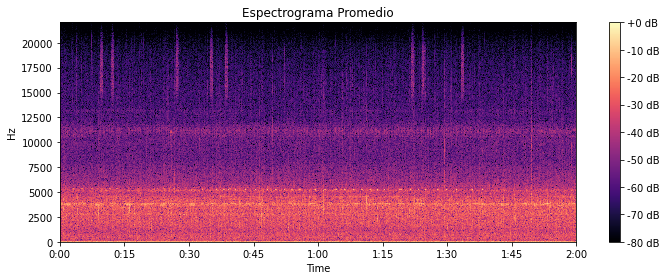

In [ ]:
# Graficar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='linear', x_axis='time', sr=sr, hop_length=512)
plt.title('Espectrograma Promedio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
#plt.savefig("/content/drive/MyDrive/PSD/espectrograma_G50_m.pdf", format="pdf")
plt.show()

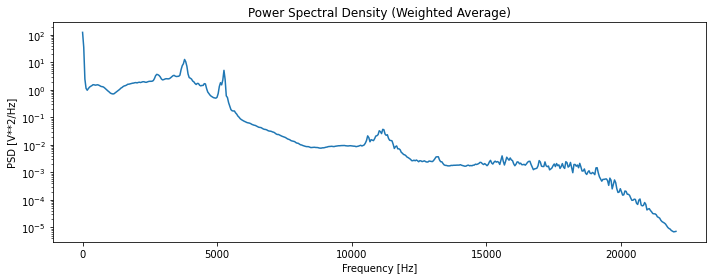

In [ ]:

f = librosa.fft_frequencies(sr=44100, n_fft=1024)
plt.figure(figsize=(10,4))
plt.semilogy(f, np.mean(psd, axis=1))#foma logariotmica
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
#plt.savefig("/content/drive/MyDrive/PSD/psd_G50_m.pdf", format="pdf")
plt.show()

In [ ]:
S.shape

(513, 10336)

#funciones

In [18]:
def calcular_promedio_psd(nombre_grabadora, n_fft=1024, cantidad_audios=None, mostrar_espectrograma=False
                          ,sumatoria_spectrograms=None,resample_rate=44100,tamaño_salto=512):

    path_to_folder = f"/content/drive/MyDrive/Jaguas_2018/{nombre_grabadora}"
    audio_paths = [os.path.join(path_to_folder, filename)
                   for filename in os.listdir(path_to_folder)
                   if filename.endswith('.wav')]

    if cantidad_audios is not None:
        audio_paths = audio_paths[:cantidad_audios]

    if sumatoria_spectrograms is None:
        sumatoria_spectrograms = np.zeros([513, 10336])

    #sumatoria_spectrograms = np.zeros([513, 10336])
    for i in range(0, len(audio_paths)):
        audio, sr = librosa.load(audio_paths[i], sr=resample_rate)

        spectrogram = librosa.stft(audio, n_fft=n_fft)
        psd = np.abs(spectrogram)**2
        sumatoria_spectrograms += psd

    f = librosa.fft_frequencies(sr=resample_rate, n_fft=n_fft)
    promedio = sumatoria_spectrograms/len(audio_paths)

    if mostrar_espectrograma:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.amplitude_to_db(promedio, ref=np.max),
                         y_axis='linear', x_axis='time', sr=sr, hop_length=tamaño_salto)
        plt.title('Espectrograma Promedio')
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(10,4))
    plt.semilogy(f, np.mean(promedio, axis=1))
    plt.title(f'Promedio PSD de {nombre_grabadora}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.tight_layout()

    nombre_pickle = f"/content/drive/MyDrive/PSD/{nombre_grabadora}.pickle"
    nombre_pdf = f"/content/drive/MyDrive/PSD/{nombre_grabadora}.pdf"

    # Guardar los resultados en formato pickle
    with open(nombre_pickle, "wb") as f:
        pickle.dump(promedio, f)

    # Guardar la figura en formato PDF
    plt.savefig(nombre_pdf, format="pdf")



    plt.show()



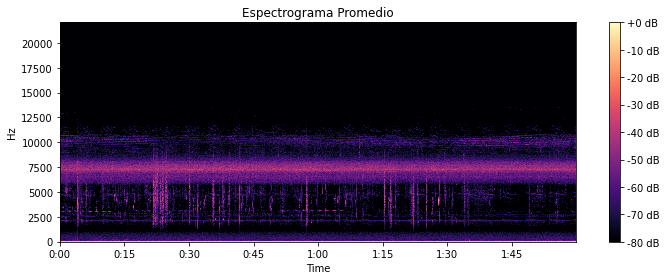

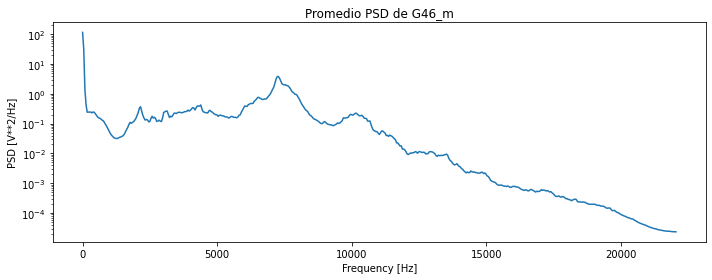

In [23]:
sumatoria_spectrograms = np.zeros([513, 10336])
calcular_promedio_psd("G46_m", mostrar_espectrograma=True,cantidad_audios=10)


In [26]:

def calcular_promedio_psd(nombre_grabadora, n_fft=1024, cantidad_audios=None, mostrar_espectrograma=True,
                          resample_rate=44100, sumatoria_spectrograms=None, nuevo_resample_rate=None, tamaño_salto=512,
                          guardar_espectrograma=True):
  
    path_to_folder = f"/content/drive/MyDrive/Jaguas_2018/{nombre_grabadora}"
    audio_paths = [os.path.join(path_to_folder, filename)
                   for filename in os.listdir(path_to_folder)
                   if filename.endswith('.wav')]

    if cantidad_audios is not None:
        audio_paths = audio_paths[:cantidad_audios]

    if sumatoria_spectrograms is None:
        sumatoria_spectrograms = np.zeros([513, 10336])

    for i in range(0, len(audio_paths)):
        audio, sr = librosa.load(audio_paths[i], sr=resample_rate)
        if nuevo_resample_rate is not None:
            audio = librosa.resample(audio, orig_sr=resample_rate, target_sr=nuevo_resample_rate)
            #sr = nuevo_resample_rate

        spectrogram = librosa.stft(audio, n_fft=n_fft)
        psd = np.abs(spectrogram)**2
        sumatoria_spectrograms += psd

    f = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    promedio = sumatoria_spectrograms/len(audio_paths)

    if mostrar_espectrograma:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.amplitude_to_db(promedio, ref=np.max),
                                 y_axis='linear', x_axis='time', sr=sr, hop_length=tamaño_salto)
        plt.title('Espectrograma Promedio')
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
        plt.show()

    plt.figure(figsize=(10,4))
    plt.semilogy(f, np.mean(promedio, axis=1))
    plt.title(f'Promedio PSD de {nombre_grabadora}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.tight_layout()

    nombre_pickle = f"/content/drive/MyDrive/PSD/{nombre_grabadora}_sr{nuevo_resample_rate}.pickle"
    nombre_pdf = f"/content/drive/MyDrive/PSD/{nombre_grabadora}_sr{nuevo_resample_rate}.pdf"
    nombre_espectrograma = f"/content/drive/MyDrive/PSD/{nombre_grabadora}_espectrograma{sr}.png"
    

    # Guardar los resultados en formato pickle
    with open(nombre_pickle, "wb") as f:
        pickle.dump(promedio, f)

    # Guardar la figura en formato PDF
    if guardar_espectrograma:
        plt.savefig(nombre_espectrograma, format="png")

    plt.show()


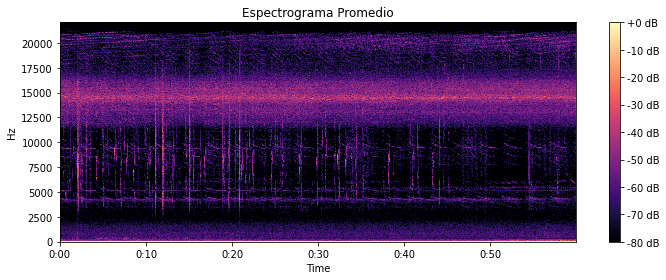

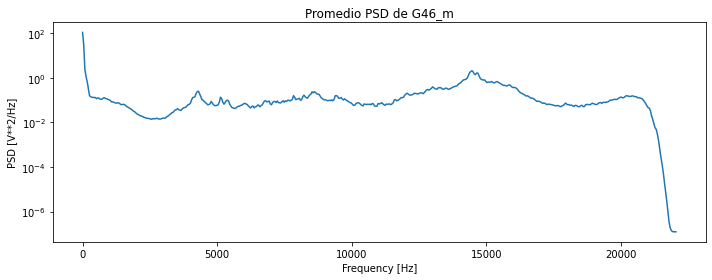

In [27]:
sumatoria_spectrograms = np.zeros([513, 5168])
calcular_promedio_psd("G46_m", sumatoria_spectrograms=sumatoria_spectrograms,cantidad_audios=5,nuevo_resample_rate=22050)



##metodos


###metodo 1

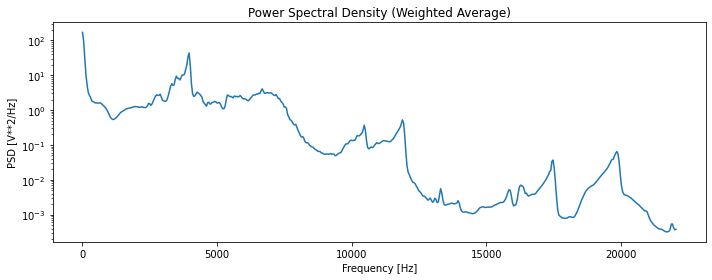

In [ ]:



import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = '/content/drive/MyDrive/Jaguas_2018/G50_m'

audio_paths = [os.path.join(path_to_folder, filename)
    for filename in os.listdir(path_to_folder)
    if filename.endswith('.wav')]


#frecuancia de muestreo
sr = 44100
#ransformada de Fourier se calcula en segmentos de 1024 muestras de audio a la vez.
n_fft = 1024
duracion_total = librosa.get_duration(filename=audio_paths[-1])

longitud_total = int(duracion_total * sr / n_fft) + 1
sumatoria_spectrograms = np.zeros([513, longitud_total])


for i in range(0, len(audio_paths)):
    audio, sr = librosa.load(audio_paths[i], sr=44100)
    spectrogram = librosa.stft(audio, n_fft=1024)
    psd = np.abs(spectrogram)**2
    psd = psd[:, :longitud_total] # corregir la forma de psd
    sumatoria_spectrograms += psd

f = librosa.fft_frequencies(sr=44100, n_fft=1024)

promedio1 = sumatoria_spectrograms/len(audio_paths)

plt.figure(figsize=(10,4))
plt.semilogy(f, np.mean(promedio1, axis=1))#forma logarítmica
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PSD/psd_G50_m.pdf", format="pdf")
plt.show()




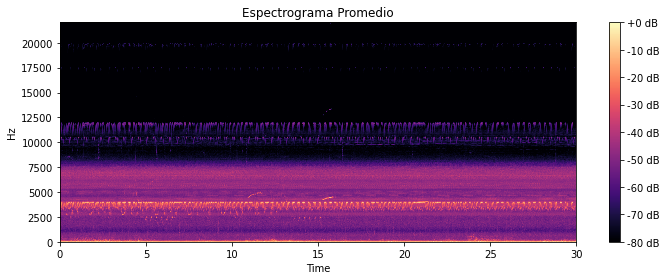

In [ ]:
# Graficar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(promedio1, ref=np.max),
                         y_axis='linear', x_axis='time', sr=sr, hop_length=512)
plt.title('Espectrograma Promedio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PSD/espectrograma_G50_m.pdf", format="pdf")
plt.show()

###metodo2

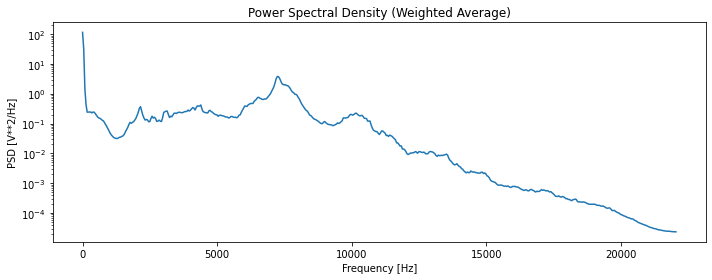

In [ ]:

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = '/content/drive/MyDrive/Jaguas_2018/G46_m'

n_fft=1024

audio_paths = [os.path.join(path_to_folder, filename)
               for filename in os.listdir(path_to_folder)
               if filename.endswith('.wav')][:10]


sumatoria_spectrograms = np.zeros([513, 10336])
for i in range(0, len(audio_paths)):
    #print(i)
    audio, sr = librosa.load(audio_paths[i], sr=44100)

    spectrogram = librosa.stft(audio, n_fft=1024)
    psd = np.abs(spectrogram)**2
    sumatoria_spectrograms += psd

f = librosa.fft_frequencies(sr=44100, n_fft=1024)
promedio_mod = sumatoria_spectrograms/len(audio_paths)


plt.figure(figsize=(10,4))
plt.semilogy(f, np.mean(promedio_mod, axis=1))#foma logariotmica
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PSD/psd_G46_m.pdf", format="pdf")
plt.show()




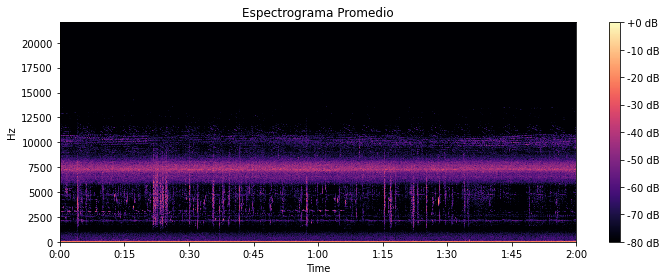

In [ ]:
# Graficar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(promedio, ref=np.max),
                         y_axis='linear', x_axis='time', sr=sr, hop_length=512)
plt.title('Espectrograma Promedio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PSD/espectrograma_G50_m.pdf", format="pdf")
plt.show()


###guardar en pickel

In [ ]:

with open('/content/drive/MyDrive/PSD/psd_G50_m.pkl', 'wb') as f:
    pickle.dump(promedio, f)

In [ ]:
with open('/content/drive/MyDrive/PSD/psd_G50_m.pkl', 'rb') as f:
    datos = pickle.load(f)

# Imprime los datos cargados
print(datos)

[[2.43426137e+02 2.35440450e+02 1.98481532e+02 ... 1.21946831e+02
  1.31597111e+02 1.73784671e+02]
 [6.26503146e+01 9.55561530e+01 1.01395050e+02 ... 5.92910069e+01
  6.85787067e+01 6.86077523e+01]
 [1.47475865e+01 1.83289889e+01 3.55819182e+01 ... 2.17707856e+01
  2.23615296e+01 2.03239287e+01]
 ...
 [6.31731553e-04 3.34005979e-04 2.02462893e-04 ... 6.63538280e-04
  1.27336420e-04 3.87833177e-04]
 [5.91575458e-04 2.92753657e-04 2.16547925e-04 ... 5.25254564e-04
  1.20273884e-04 3.79950475e-04]
 [8.48943877e-04 3.67300050e-04 2.10497634e-04 ... 6.69065482e-04
  1.00578416e-04 4.21381256e-04]]


##comparacion metodos 

In [ ]:
metodo1 = promedio
metodo2 = promedio_mod

metodo1 == metodo2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
metodo1

array([[1.29984836e+02, 1.15682820e+02, 1.14318585e+02, ...,
        1.15008138e+02, 1.12985934e+02, 1.15939612e+02],
       [3.87241955e+01, 3.87150134e+01, 3.98771065e+01, ...,
        3.57947528e+01, 3.89564299e+01, 4.36030099e+01],
       [8.05912949e+00, 7.70697281e+00, 9.10346436e+00, ...,
        3.37138032e+00, 9.05398788e+00, 7.69255912e+00],
       ...,
       [2.45139336e-03, 8.59308742e-04, 2.63348154e-04, ...,
        5.87597692e-04, 4.07187867e-04, 7.99473030e-04],
       [3.33815804e-03, 1.11232935e-03, 2.31715038e-04, ...,
        6.54885024e-04, 4.03457377e-04, 7.38557693e-04],
       [3.84675625e-03, 1.10473048e-03, 2.84336060e-04, ...,
        4.40708005e-04, 3.72797286e-04, 7.82087793e-04]])

In [ ]:
metodo2

array([1.02496842e+02, 2.70392625e+01, 4.34296423e-01, 1.51419850e-01,
       6.00284132e-02, 6.47156317e-02, 5.36715820e-02, 2.77768585e-02,
       2.77330746e-02, 3.14751241e-02, 3.60997210e-02, 3.79689002e-02,
       3.42398687e-02, 2.63277333e-02, 2.10139607e-02, 1.80781779e-02,
       1.64857786e-02, 1.41211676e-02, 9.03310151e-03, 7.05837595e-03,
       5.99008603e-03, 4.98977037e-03, 4.16592910e-03, 3.58520929e-03,
       3.32084198e-03, 3.16783796e-03, 3.05881383e-03, 3.05893271e-03,
       3.08604677e-03, 3.18666611e-03, 3.47847618e-03, 3.64439911e-03,
       3.77457037e-03, 3.77458630e-03, 3.71772182e-03, 3.69902352e-03,
       3.69514133e-03, 3.63493072e-03, 3.65853305e-03, 3.72574660e-03,
       3.95063573e-03, 4.31854711e-03, 4.48775602e-03, 3.80580757e-03,
       3.31407647e-03, 3.17345813e-03, 3.22304051e-03, 3.25185754e-03,
       3.21240485e-03, 3.12482224e-03, 3.12739986e-03, 3.47032225e-03,
       5.42473996e-03, 1.21971709e-02, 1.86270049e-02, 1.64641683e-02,
      

##Grabadoras

In [ ]:
import os
import shutil

path_to_audio_folders = '/content/drive/MyDrive/Jaguas_2018/'

for foldername in os.listdir(path_to_audio_folders):
    if os.path.isdir(os.path.join(path_to_audio_folders, foldername)):
        folder_audio_count = 0
        folder_path = os.path.join(path_to_audio_folders, foldername)
        
        print('Carpeta:', foldername)
        
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'):
                folder_audio_count += 1
        
        print('Cantidad de archivos de audio:', folder_audio_count)


Carpeta: G41_m
Cantidad de archivos de audio: 553
Carpeta: G46_m
Cantidad de archivos de audio: 735
Carpeta: G49_m
Cantidad de archivos de audio: 801
Carpeta: G58_m
Cantidad de archivos de audio: 735
Carpeta: G52_m
Cantidad de archivos de audio: 465
Carpeta: G50_m
Cantidad de archivos de audio: 620
Carpeta: G54_m
Cantidad de archivos de audio: 576
Carpeta: G47_m
Cantidad de archivos de audio: 804
Carpeta: G51_m
Cantidad de archivos de audio: 408
Carpeta: G57_m
Cantidad de archivos de audio: 621
Carpeta: G25_m
Cantidad de archivos de audio: 645
Carpeta: G27_m
Cantidad de archivos de audio: 644
Carpeta: G29_m
Cantidad de archivos de audio: 553
Carpeta: G35_m
Cantidad de archivos de audio: 627
Carpeta: G34_m
Cantidad de archivos de audio: 664
Carpeta: G24_m
Cantidad de archivos de audio: 555
Carpeta: G40_m
Cantidad de archivos de audio: 555
Carpeta: G36_m
Cantidad de archivos de audio: 545
Carpeta: G37_m
Cantidad de archivos de audio: 541
Carpeta: G28_m
Cantidad de archivos de audio: 553
